## This is Markdown

In [2]:
print('This is Python')

This is Python


### So basically...

A Jupyter notebook can:

>Use text to explain your data

>Explain data points, outliers, and other factors right next to the displayed data

>Format a presentaion for the fidnings of analyzed data.

## Using python to display data:

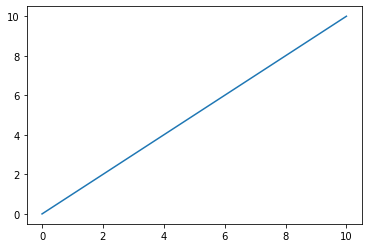

In [1]:
import matplotlib.pyplot as plt

x = [0,1,2,3,4,5,6,7,8,9,10]
y = [0,1,2,3,4,5,6,7,8,9,10]

plt.plot(x, y)
plt.show()

# Let's Try a Real Example

### First, we are going to import some dependancies that we will be using for this visual:

In [22]:
import requests
import pandas as pd

Now, we are going to conenct to a free API in order to display historical price data for two major crypto-curriencies in the past seven days.

In [24]:
def get_historic_price(symbol, exchange='bitfinex', after='2022-07-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    },)
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

Now we can pull the data

In [25]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-07-01 14:38:42.220835')

In [28]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [29]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

### Bitcoin:

In [30]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-07-01 15:00:00,19434.33,19514.39,19272.57,19379.31,111.629059,2.159245e+06
2022-07-01 16:00:00,19377.83,19465.78,19200.58,19277.41,84.782339,1.641442e+06
2022-07-01 17:00:00,19280.56,19446.21,19238.06,19319.95,41.063379,7.951295e+05
2022-07-01 18:00:00,19332.96,19502.88,19300.00,19472.32,53.899314,1.046883e+06
2022-07-01 19:00:00,19473.51,19515.21,19373.67,19422.95,28.945207,5.632546e+05


<AxesSubplot:xlabel='CloseTime'>

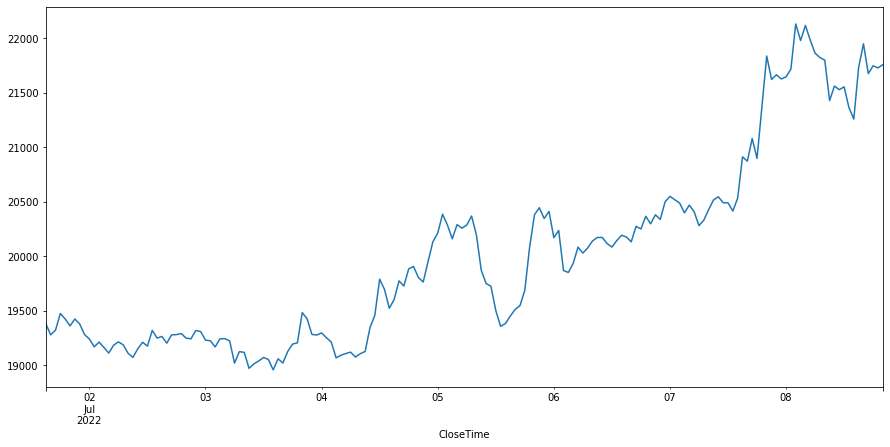

In [32]:
btc['ClosePrice'].plot(figsize=(15,7))

In [34]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02
mean,19997.492184,20108.962126,19899.947529,20010.037299,97.918458,1.994904e+06
std,869.803568,896.162678,848.549037,878.056323,123.652737,2.624931e+06
min,18959.790000,19062.860000,18763.960000,18955.310000,9.618878,1.837200e+05
25%,19247.685000,19322.502500,19175.797500,19246.470000,31.218216,6.120240e+05
50%,19821.520000,19956.480000,19717.815000,19858.040000,56.754706,1.150872e+06
75%,20402.070000,20478.255000,20324.815000,20408.532500,111.267873,2.191963e+06
max,22142.710000,22401.000000,21952.540000,22128.970000,1035.380949,2.233666e+07


### Ethereum

In [31]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-07-01 15:00:00,1060.70,1064.58,1044.33,1055.96,648.320705,683804.159253
2022-07-01 16:00:00,1055.43,1063.65,1051.24,1056.78,558.378329,590358.928331
2022-07-01 17:00:00,1056.40,1070.00,1053.57,1064.99,524.299771,558240.590692
2022-07-01 18:00:00,1064.00,1079.88,1060.86,1073.02,508.297292,544051.309111
2022-07-01 19:00:00,1072.97,1075.94,1066.61,1070.65,338.342505,362326.217965


<AxesSubplot:xlabel='CloseTime'>

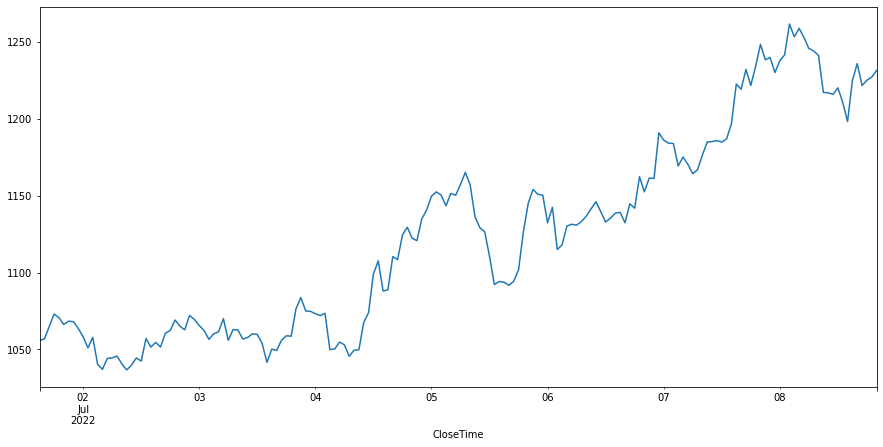

In [33]:
eth['ClosePrice'].plot(figsize=(15,7))

In [36]:
eth.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02
mean,1123.435402,1131.696954,1116.242874,1124.322069,711.935529,8.193271e+05
std,65.231175,66.351660,64.330085,65.556212,1199.154889,1.394704e+06
min,1036.710000,1042.170000,1026.520000,1036.720000,62.209495,6.595292e+04
25%,1062.290000,1069.657500,1056.912500,1062.467500,206.028016,2.238869e+05
50%,1123.910000,1132.520000,1114.505000,1125.365000,352.596306,3.996816e+05
75%,1166.612500,1175.975000,1162.977500,1168.647500,651.930918,7.742630e+05
max,1262.210000,1275.040000,1252.260000,1261.500000,10209.049686,1.185464e+07


## Dynamic plots with Bokeh

#### We can use a different library to create dynamic and interactive graphs, better suited for analyzing your visualized data.

First, let's import:

In [38]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [39]:
output_notebook()

Loading BokehJS ...

And now we can generate the plot:

In [42]:
p1 = figure(x_axis_type='datetime', title='Crypto Prices', width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label= 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend_label='Bitcoin')

p1.legend.location = 'top_left'

show(p1)

While Bokeh is a cool tool, matplotlib still has significantly more tools available for use, and is often the go to.